In [2]:
# Import dependencies 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator
import numpy as np
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager


In [3]:
#Read pandas 
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
df = df[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
# Check data type 
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [7]:
#There are 12 Martian Months. 
mars_months = np.unique(df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
#There are 1,977 Sols, or Martian days in the scraped dataset. 
sols = np.unique(df['sol'])
sols

In [102]:
# get table headers
headers = list(df)
# coldest and warmest months on Mars
mintemp_df = df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mintemp_df

,month,sol,ls,min_temp,pressure
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
1,2,1175.853933,44.258427,-79.932584,889.455056
4,5,1182.691275,132.885906,-79.308725,748.557047
0,1,1077.574713,15.281609,-77.160920,862.488506
5,6,750.829932,164.897959,-75.299320,745.054422
11,12,990.951807,344.692771,-74.451807,842.156627
6,7,715.105634,194.894366,-72.281690,795.105634
10,11,947.224638,314.536232,-71.985507,857.014493
9,10,1034.669643,286.330357,-71.982143,887.312500


In [103]:
#The coldest month on Mars is month 3, the warmest month on Mars is month 8. Plot the min temp average by month.
mars_temps_df = df
mars_temps_df

headers=list(mars_temps_df)
mars_min_temp = mars_temps_df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
mars_min_temp

,month,sol,ls,min_temp,pressure
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
1,2,1175.853933,44.258427,-79.932584,889.455056
4,5,1182.691275,132.885906,-79.308725,748.557047
0,1,1077.574713,15.281609,-77.160920,862.488506
5,6,750.829932,164.897959,-75.299320,745.054422
11,12,990.951807,344.692771,-74.451807,842.156627
6,7,715.105634,194.894366,-72.281690,795.105634
10,11,947.224638,314.536232,-71.985507,857.014493
9,10,1034.669643,286.330357,-71.982143,887.312500


In [104]:
#Isolate min and max temps 
mars_temps_df.loc[(mars_temps_df['min_temp'] == mars_temps_df['min_temp'].min()) | (mars_temps_df['min_temp'] == mars_temps_df['min_temp'].max()), headers[1:]]


,terrestrial_date,sol,ls,month,min_temp,pressure
1093,2015-12-09,1188,79,3,-90.0,881.0
1582,2017-05-10,1692,2,1,-62.0,820.0


Text(0.5, 1.0, 'Average Min Temps by Martian Month')

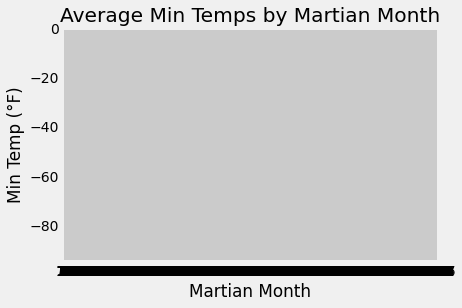

In [127]:
plt.bar(mars_temps_df['month'], mars_temps_df['min_temp'])
plt.xlabel("Martian Month")
plt.ylabel('Min Temp (\N{DEGREE SIGN}F)')
plt.xticks(np.arange(0,len(mars_temps_df['month'])+1, 1))
plt.title('Average Min Temps by Martian Month')

In [107]:
#The month with the lowest atmospheric pressure is month 6, the month with the highest atmopsheric pressure is month 9. 
#Plot the average pressure by month. 
pressure_df = df
pressure_df

column_headers = list(pressure_df)
pressure = pressure_df[column_headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
pressure

,month,sol,ls,min_temp,pressure
5,6,750.829932,164.897959,-75.299320,745.054422
4,5,1182.691275,132.885906,-79.308725,748.557047
6,7,715.105634,194.894366,-72.281690,795.105634
3,4,1244.500000,104.365979,-82.747423,806.329897
11,12,990.951807,344.692771,-74.451807,842.156627
10,11,947.224638,314.536232,-71.985507,857.014493
0,1,1077.574713,15.281609,-77.160920,862.488506
7,8,795.333333,224.347518,-68.382979,873.829787
2,3,1204.406250,75.010417,-83.307292,877.322917
9,10,1034.669643,286.330357,-71.982143,887.312500


Text(0.5, 1.0, 'Atmospheric Pressure by Martian Month')

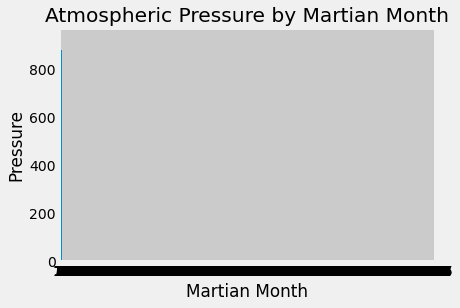

In [128]:
# plot the average atmospheric daily pressure of all the months
plt.bar(mars_temps_df['month'], mars_temps_df['pressure'])
plt.xlabel("Martian Month")
plt.ylabel('Pressure')
plt.xticks(np.arange(0,len(mars_temps_df['month'])+1, 1))
plt.title('Atmospheric Pressure by Martian Month')

In [129]:
#There are 687 terrestrial days in one Martian year. 
days_df = df
days_df

days = days_df.groupby('terrestrial_date', as_index=False).mean().sort_values('min_temp')
days

,terrestrial_date,id,sol,ls,month,min_temp,pressure
1093,2015-12-09,1119.0,1188.0,79.0,3.0,-90.0,881.0
1144,2016-01-31,1168.0,1239.0,102.0,4.0,-89.0,818.0
1074,2015-11-20,1100.0,1169.0,70.0,3.0,-89.0,894.0
1142,2016-01-29,1169.0,1237.0,101.0,4.0,-88.0,820.0
1140,2016-01-27,1165.0,1235.0,100.0,4.0,-88.0,824.0
...,...,...,...,...,...,...,...
131,2013-01-02,52.0,145.0,236.0,8.0,-64.0,909.0
138,2013-01-09,60.0,152.0,241.0,9.0,-63.0,914.0
926,2015-06-20,938.0,1020.0,0.0,1.0,-63.0,832.0
129,2012-12-31,50.0,143.0,235.0,8.0,-63.0,908.0


In [114]:
sols = np.unique(df['sol'])
sols

array([  10,   11,   12, ..., 1975, 1976, 1977])

In [117]:
# number of terrestrial days included in the dataset
print(df['terrestrial_date'].agg(['max', 'min']))
terrestrial_range = (df['terrestrial_date'].max() - df['terrestrial_date'].min()).days

#2,021 terrestrial days 

max   2018-02-27
min   2012-08-16
Name: terrestrial_date, dtype: datetime64[ns]


In [1]:
# Export the DataFrame as a CSV file
file_name = './mars_data.csv'
df.to_csv(file_name, index=False)

NameError: name 'df' is not defined